# Analise Exploratória dos Dados e Processamento

## 0 - Importação

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from optbinning import OptimalBinning
import seaborn as sns
import researchpy

from sklearn.impute import KNNImputer

from sklearn.metrics import r2_score,mean_absolute_error

from sklearn.preprocessing import StandardScaler,MinMaxScaler

%matplotlib inline
pd.set_option('display.max_rows', 100)

import warnings

# Ignorar especificamente RuntimeWarning
warnings.filterwarnings(action='ignore', category=RuntimeWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns',200)

## 1 - Leitura dos Dados

In [2]:
df = pd.read_csv('dados/base_modelo.csv')
df

id   safra  y  VAR_1  VAR_2  VAR_3  VAR_4   VAR_5   VAR_6   VAR_7  \
0          1  201404  0    0.0    0.0    0.0    0.0  124.54  3277.0   51.98   
1          2  201407  0   64.0    0.0    2.0    1.0   47.92  2443.0   84.72   
2          3  201405  0   99.0    2.0    2.0    2.0   80.38  1824.0   26.63   
3          4  201412  0    0.0    0.0    0.0    0.0   10.58  3796.0     NaN   
4          5  201403  1    0.0    0.0    0.0    0.0   70.46   437.0   40.69   
...      ...     ... ..    ...    ...    ...    ...     ...     ...     ...   
10733  10734  201406  0   44.0    0.0    0.0    1.0  107.49   515.0  183.36   
10734  10735  201407  0    0.0    0.0    0.0    0.0   39.98  1029.0     NaN   
10735  10736  201403  1  169.0    3.0    1.0    2.0  105.08   819.0   49.28   
10736  10737  201402  1   46.0    0.0    0.0    1.0  265.79  1740.0     NaN   
10737  10738  201404  1   51.0    0.0    0.0    1.0     NaN  2573.0     NaN   

       VAR_8    VAR_9  VAR_10  VAR_11  VAR_12  VAR_13  VAR_14  VAR_15  VAR_16  \
0        NaN   500.00   153.0     NaN   299.0   73.26  1024.0   26.98   162.0   
1        NaN  1000.00   649.0     NaN   224.0   38.53     NaN     NaN    84.0   
2        NaN  1893.35   346.0   29.98   106.0     NaN     NaN   73.55     8.0   
3        NaN  3000.00   119.0     NaN     NaN     NaN  1609.0     NaN    36.0   
4      10.99  2000.00     NaN   62.78     NaN     NaN   288.0   29.58     NaN   
...      ...      ...     ...     ...     ...     ...     ...     ...     ...   
10733  49.70   500.00     NaN   20.64     NaN     NaN     NaN   50.98     NaN   
10734    NaN  1724.65   141.0     NaN    91.0     NaN   342.0     NaN     NaN   
10735  74.20  2759.03   260.0  127.34     NaN  101.96   399.0   37.58     NaN   
10736  15.45  1000.00   351.0     NaN   379.0   23.68     NaN     NaN    66.0   
10737    NaN  1851.27   385.0     NaN   654.0   18.69     NaN     NaN    84.0   

       VAR_17  VAR_18  VAR_19  VAR_20  VAR_21  VAR_22  VAR_23  VAR_24  VAR_25  \
0      3000.0    72.0    45.0       8  1279.0    63.0   77.67  492.84    12.0   
1         NaN    50.0    18.0      12  1063.0    31.0  177.39  335.44     9.0   
2         NaN     3.0     2.0      12   116.0     4.0  140.25  362.71     3.0   
3      1500.0    17.0    11.0      12   255.0    14.0   29.99   74.06     0.0   
4         NaN     NaN     0.0      12     NaN     0.0     NaN  493.22     0.0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
10733     NaN     NaN     0.0      10     NaN     0.0     NaN  601.87     0.0   
10734     NaN     NaN     0.0      12     NaN     0.0   29.01   39.98     0.0   
10735  2000.0     NaN     0.0      12     NaN     0.0   52.00  443.92     0.0   
10736  1000.0     9.0     6.0      12   170.0     8.0   89.81  934.03     8.0   
10737     NaN    33.0    17.0      12  1114.0    25.0   77.35     NaN     8.0   

       VAR_26  VAR_27  VAR_28  VAR_29   VAR_30  VAR_31    VAR_32  VAR_33  \
0       845.0     NaN    12.0    16.0   500.00    22.0  0.133833    18.0   
1         NaN   842.0    10.0     NaN  1000.00    14.0  0.133833    13.0   
2         NaN   597.0     5.0     NaN  1893.35     NaN  0.133833     2.0   
3      1238.0     NaN     0.0     5.0  3000.00    12.0  0.133833     3.0   
4        43.0     NaN     0.0    -9.0  2000.00     0.0  0.090634     0.0   
...       ...     ...     ...     ...      ...     ...       ...     ...   
10733     NaN     NaN     0.0     NaN   500.00     NaN  0.090634     0.0   
10734   215.0     NaN     0.0    71.0  1724.65     0.0  0.133833     0.0   
10735     9.0     NaN     0.0    35.0  2759.03     0.0  0.133833     0.0   
10736     NaN     NaN    11.0     NaN  1000.00    18.0  0.133833     2.0   
10737     NaN   548.0     9.0     NaN  1851.27    16.0  0.133833     8.0   

       VAR_34  VAR_35  VAR_36  VAR_37  VAR_38  VAR_39  VAR_40  VAR_41  VAR_42  \
0         NaN     NaN    0.00    16.0  220.84   348.0     9.0    9.57    33.0   
1         NaN     NaN     NaN     NaN  3

## 2 - Analise dos Dados

### Verificando Nulos

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10738 entries, 0 to 10737
Data columns (total 81 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      10738 non-null  int64  
 1   safra   10738 non-null  int64  
 2   y       10738 non-null  int64  
 3   VAR_1   10322 non-null  float64
 4   VAR_2   10322 non-null  float64
 5   VAR_3   10322 non-null  float64
 6   VAR_4   10322 non-null  float64
 7   VAR_5   6678 non-null   float64
 8   VAR_6   10647 non-null  float64
 9   VAR_7   6106 non-null   float64
 10  VAR_8   5905 non-null   float64
 11  VAR_9   10738 non-null  float64
 12  VAR_10  5173 non-null   float64
 13  VAR_11  5754 non-null   float64
 14  VAR_12  3541 non-null   float64
 15  VAR_13  5520 non-null   float64
 16  VAR_14  5197 non-null   float64
 17  VAR_15  5684 non-null   float64
 18  VAR_16  3631 non-null   float64
 19  VAR_17  6237 non-null   float64
 20  VAR_18  3615 non-null   float64
 21  VAR_19  10677 non-null  float64
 22

In [4]:
# Criando as features flag de nulos
for i in range(1,79):
    df[f'VAR_{i}_is_null'] = df[f'VAR_{i}'].isnull()

df

id   safra  y  VAR_1  VAR_2  VAR_3  VAR_4   VAR_5   VAR_6   VAR_7  \
0          1  201404  0    0.0    0.0    0.0    0.0  124.54  3277.0   51.98   
1          2  201407  0   64.0    0.0    2.0    1.0   47.92  2443.0   84.72   
2          3  201405  0   99.0    2.0    2.0    2.0   80.38  1824.0   26.63   
3          4  201412  0    0.0    0.0    0.0    0.0   10.58  3796.0     NaN   
4          5  201403  1    0.0    0.0    0.0    0.0   70.46   437.0   40.69   
...      ...     ... ..    ...    ...    ...    ...     ...     ...     ...   
10733  10734  201406  0   44.0    0.0    0.0    1.0  107.49   515.0  183.36   
10734  10735  201407  0    0.0    0.0    0.0    0.0   39.98  1029.0     NaN   
10735  10736  201403  1  169.0    3.0    1.0    2.0  105.08   819.0   49.28   
10736  10737  201402  1   46.0    0.0    0.0    1.0  265.79  1740.0     NaN   
10737  10738  201404  1   51.0    0.0    0.0    1.0     NaN  2573.0     NaN   

       VAR_8    VAR_9  VAR_10  VAR_11  VAR_12  VAR_13  VAR_14  VAR_15  VAR_16  \
0        NaN   500.00   153.0     NaN   299.0   73.26  1024.0   26.98   162.0   
1        NaN  1000.00   649.0     NaN   224.0   38.53     NaN     NaN    84.0   
2        NaN  1893.35   346.0   29.98   106.0     NaN     NaN   73.55     8.0   
3        NaN  3000.00   119.0     NaN     NaN     NaN  1609.0     NaN    36.0   
4      10.99  2000.00     NaN   62.78     NaN     NaN   288.0   29.58     NaN   
...      ...      ...     ...     ...     ...     ...     ...     ...     ...   
10733  49.70   500.00     NaN   20.64     NaN     NaN     NaN   50.98     NaN   
10734    NaN  1724.65   141.0     NaN    91.0     NaN   342.0     NaN     NaN   
10735  74.20  2759.03   260.0  127.34     NaN  101.96   399.0   37.58     NaN   
10736  15.45  1000.00   351.0     NaN   379.0   23.68     NaN     NaN    66.0   
10737    NaN  1851.27   385.0     NaN   654.0   18.69     NaN     NaN    84.0   

       VAR_17  VAR_18  VAR_19  VAR_20  VAR_21  VAR_22  VAR_23  VAR_24  VAR_25  \
0      3000.0    72.0    45.0       8  1279.0    63.0   77.67  492.84    12.0   
1         NaN    50.0    18.0      12  1063.0    31.0  177.39  335.44     9.0   
2         NaN     3.0     2.0      12   116.0     4.0  140.25  362.71     3.0   
3      1500.0    17.0    11.0      12   255.0    14.0   29.99   74.06     0.0   
4         NaN     NaN     0.0      12     NaN     0.0     NaN  493.22     0.0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
10733     NaN     NaN     0.0      10     NaN     0.0     NaN  601.87     0.0   
10734     NaN     NaN     0.0      12     NaN     0.0   29.01   39.98     0.0   
10735  2000.0     NaN     0.0      12     NaN     0.0   52.00  443.92     0.0   
10736  1000.0     9.0     6.0      12   170.0     8.0   89.81  934.03     8.0   
10737     NaN    33.0    17.0      12  1114.0    25.0   77.35     NaN     8.0   

       VAR_26  VAR_27  VAR_28  VAR_29   VAR_30  VAR_31    VAR_32  VAR_33  \
0       845.0     NaN    12.0    16.0   500.00    22.0  0.133833    18.0   
1         NaN   842.0    10.0     NaN  1000.00    14.0  0.133833    13.0   
2         NaN   597.0     5.0     NaN  1893.35     NaN  0.133833     2.0   
3      1238.0     NaN     0.0     5.0  3000.00    12.0  0.133833     3.0   
4        43.0     NaN     0.0    -9.0  2000.00     0.0  0.090634     0.0   
...       ...     ...     ...     ...      ...     ...       ...     ...   
10733     NaN     NaN     0.0     NaN   500.00     NaN  0.090634     0.0   
10734   215.0     NaN     0.0    71.0  1724.65     0.0  0.133833     0.0   
10735     9.0     NaN     0.0    35.0  2759.03     0.0  0.133833     0.0   
10736     NaN     NaN    11.0     NaN  1000.00    18.0  0.133833     2.0   
10737     NaN   548.0     9.0     NaN  1851.27    16.0  0.133833     8.0   

       VAR_34  VAR_35  VAR_36  VAR_37  VAR_38  VAR_39  VAR_40  VAR_41  VAR_42  \
0         NaN     NaN    0.00    16.0  220.84   348.0     9.0    9.57    33.0   
1         NaN     NaN     NaN     NaN  3

Para indicar a força da associação entre duas variáveis nominais, o V de Cramér (Cramér, 1946) é frequentemente utilizado.

Quanto à interpretação do V de Cramér, existem várias regras práticas, mas uma delas é de Cohen (1988, pp. 222, 224, 225), que faz a interpretação depender dos graus de liberdade, conforme mostrado na tabela abaixo.

|df*|negligible|small|medium|large|
|-------|---|---|---|---|
|1|0 < .10|.10 < .30|.30 < .50|.50 or more|
|2|0 < .07|.07 < .21|.21 < .35|.35 or more|
|3|0 < .06|.06 < .17|.17 < .29|.29 or more|
|4|0 < .05|.05 < .15|.15 < .25|.25 or more|
|5|0 < .05|.05 < .13|.13 < .22|.22 or more|

Os graus de liberdade (df*) para o V de Cramér são definidos como o mínimo entre o número de linhas ou o número de colunas, menos um, da tabela cruzada (crosstab).

In [5]:
df_test_cramers = pd.DataFrame()
for i in range(1,79):
    crosstab, res = researchpy.crosstab(df['y'], df[f'VAR_{i}_is_null'], test='chi-square')
    aux = pd.DataFrame({'VAR': f'VAR_{i}_is_null', 'cramers_v': res.iloc[-1,1], 'p_value':res.iloc[-2,1], }, index=[0])
    df_test_cramers = pd.concat([df_test_cramers, aux], axis=0)
df_test_cramers

VAR  cramers_v  p_value
0   VAR_1_is_null     0.0352   0.0003
0   VAR_2_is_null     0.0352   0.0003
0   VAR_3_is_null     0.0352   0.0003
0   VAR_4_is_null     0.0352   0.0003
0   VAR_5_is_null     0.0576   0.0000
0   VAR_6_is_null     0.0078   0.4163
0   VAR_7_is_null     0.0432   0.0000
0   VAR_8_is_null     0.0354   0.0002
0   VAR_9_is_null     0.0000   1.0000
0  VAR_10_is_null     0.1361   0.0000
0  VAR_11_is_null     0.0102   0.2899
0  VAR_12_is_null     0.1406   0.0000
0  VAR_13_is_null     0.0857   0.0000
0  VAR_14_is_null     0.0840   0.0000
0  VAR_15_is_null     0.0022   0.8236
0  VAR_16_is_null     0.1589   0.0000
0  VAR_17_is_null     0.1212   0.0000
0  VAR_18_is_null     0.1562   0.0000
0  VAR_19_is_null     0.0048   0.6171
0  VAR_20_is_null     0.0000   1.0000
0  VAR_21_is_null     0.1562   0.0000
0  VAR_22_is_null     0.0048   0.6171
0  VAR_23_is_null     0.1361   0.0000
0  VAR_24_is_null     0.0576   0.0000
0  VAR_25_is_null     0.0048   0.6171
0  VAR_26_is_null     0.0840   0.0000
0  VAR_27_is_null     0.0748   0.0000
0  VAR_28_is_null     0.0048   0.6171
0  VAR_29_is_null     0.0722   0.0000
0  VAR_30_is_null     0.0093   0.3367
0  VAR_31_is_null     0.1277   0.0000
0  VAR_32_is_null     0.0000   1.0000
0  VAR_33_is_null     0.0048   0.6171
0  VAR_34_is_null     0.0354   0.0002
0  VAR_35_is_null     0.0102   0.2899
0  VAR_36_is_null     0.0735   0.0000
0  VAR_37_is_null     0.0696   0.0000
0  VAR_38_is_null     0.0432   0.0000
0  VAR_39_is_null     0.0857   0.0000
0  VAR_40_is_null     0.0048   0.6171
0  VAR_41_is_null     0.0646   0.0000
0  VAR_42_is_null     0.0771   0.0000
0  VAR_43_is_null     0.1406   0.0000
0  VAR_44_is_null     0.0048   0.6171
0  VAR_45_is_null     0.0857   0.0000
0  VAR_46_is_null     0.0820   0.0000
0  VAR_47_is_null     0.1591   0.0000
0  VAR_48_is_null     0.0668   0.0000
0  VAR_49_is_null     0.0302   0.0018
0  VAR_50_is_null     0.0732   0.0000
0  VAR_51_is_null     0.0840   0.0000
0  VAR_52_is_null     0.0022   0.8236
0  VAR_53_is_null     0.0740   0.0000
0  VAR_54_is_null     0.0618   0.0000
0  VAR_55_is_null     0.0801   0.0000
0  VAR_56_is_null     0.0513   0.0000
0  VAR_57_is_null     0.0000   1.0000
0  VAR_58_is_null     0.0576   0.0000
0  VAR_59_is_null     0.1104   0.0000
0  VAR_60_is_null     0.0000   1.0000
0  VAR_61_is_null     0.0808   0.0000
0  VAR_62_is_null     0.1355   0.0000
0  VAR_63_is_null     0.0869   0.0000
0  VAR_64_is_null     0.0000   1.0000
0  VAR_65_is_null     0.0612   0.0000
0  VAR_66_is_null     0.1361   0.0000
0  VAR_67_is_null     0.0934   0.0000
0  VAR_68_is_null     0.0732   0.0000
0  VAR_69_is_null     0.1361   0.0000
0  VAR_70_is_null     0.0988   0.0000
0  VAR_71_is_null     0.0840   0.0000
0  VAR_72_is_null     0.0078   0.4163
0  VAR_73_is_null     0.0840   0.0000
0  VAR_74_is_null     0.0840   0.0000
0  VAR_75_is_null     0.0646   0.0000
0  VAR_76_is_null     0.1104   0.0000
0  VAR_77_is_null     0.1361   0.0000
0  VAR_78_is_null     0.0840   0.0000

In [6]:
# for df=1
df_test_cramers.query('cramers_v>0.1 and p_value<0.05')

VAR  cramers_v  p_value
0  VAR_10_is_null     0.1361      0.0
0  VAR_12_is_null     0.1406      0.0
0  VAR_16_is_null     0.1589      0.0
0  VAR_17_is_null     0.1212      0.0
0  VAR_18_is_null     0.1562      0.0
0  VAR_21_is_null     0.1562      0.0
0  VAR_23_is_null     0.1361      0.0
0  VAR_31_is_null     0.1277      0.0
0  VAR_43_is_null     0.1406      0.0
0  VAR_47_is_null     0.1591      0.0
0  VAR_59_is_null     0.1104      0.0
0  VAR_62_is_null     0.1355      0.0
0  VAR_66_is_null     0.1361      0.0
0  VAR_69_is_null     0.1361      0.0
0  VAR_76_is_null     0.1104      0.0
0  VAR_77_is_null     0.1361      0.0

In [7]:
cols_to_remove_flag_null =list(set([col for col in df.columns if col != 'safra' and ('is_null' in col)]) - set(list(df_test_cramers.query('cramers_v>0.1 and p_value<0.05')['VAR'].values)))
cols_to_remove_flag_null

['VAR_19_is_null',
 'VAR_40_is_null',
 'VAR_68_is_null',
 'VAR_38_is_null',
 'VAR_20_is_null',
 'VAR_5_is_null',
 'VAR_22_is_null',
 'VAR_48_is_null',
 'VAR_45_is_null',
 'VAR_60_is_null',
 'VAR_55_is_null',
 'VAR_44_is_null',
 'VAR_11_is_null',
 'VAR_39_is_null',
 'VAR_37_is_null',
 'VAR_42_is_null',
 'VAR_64_is_null',
 'VAR_65_is_null',
 'VAR_6_is_null',
 'VAR_56_is_null',
 'VAR_15_is_null',
 'VAR_58_is_null',
 'VAR_49_is_null',
 'VAR_41_is_null',
 'VAR_51_is_null',
 'VAR_34_is_null',
 'VAR_57_is_null',
 'VAR_3_is_null',
 'VAR_70_is_null',
 'VAR_52_is_null',
 'VAR_29_is_null',
 'VAR_27_is_null',
 'VAR_13_is_null',
 'VAR_25_is_null',
 'VAR_35_is_null',
 'VAR_63_is_null',
 'VAR_36_is_null',
 'VAR_1_is_null',
 'VAR_75_is_null',
 'VAR_61_is_null',
 'VAR_8_is_null',
 'VAR_53_is_null',
 'VAR_46_is_null',
 'VAR_26_is_null',
 'VAR_67_is_null',
 'VAR_71_is_null',
 'VAR_33_is_null',
 'VAR_9_is_null',
 'VAR_24_is_null',
 'VAR_74_is_null',
 'VAR_2_is_null',
 'VAR_32_is_null',
 'VAR_72_is_null',


Portanto, removeremos as features acima, devido sua baixa força de associação com a target

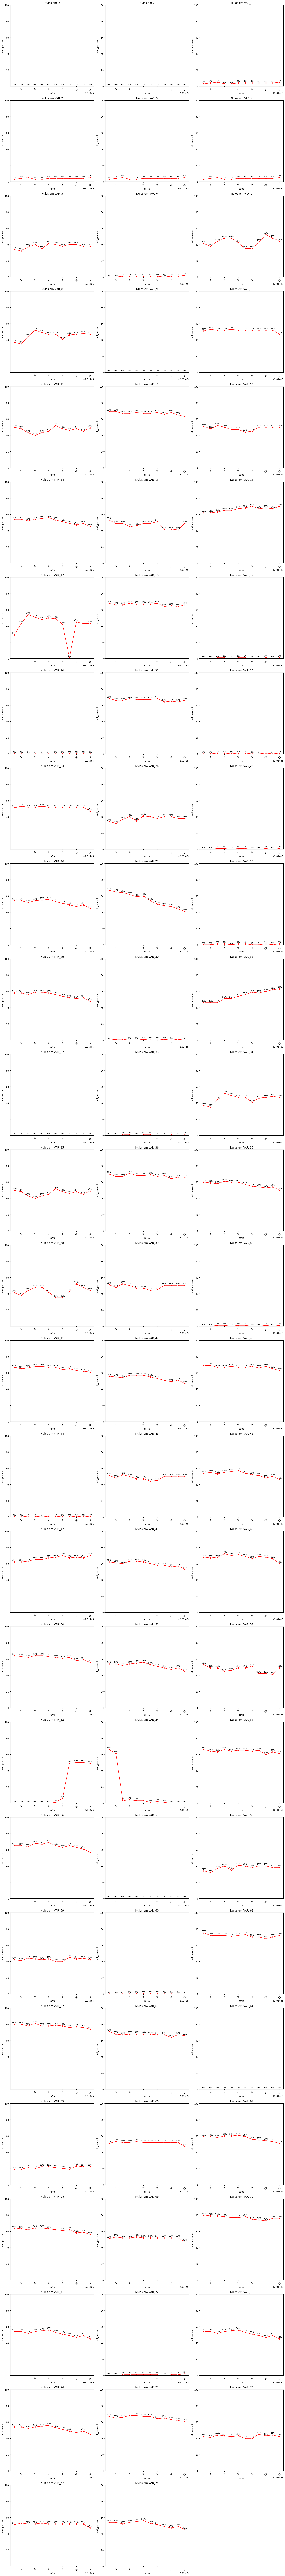

In [8]:
def plot_all_features_in_grid(df, time_column='safra'):
    features = [col for col in df.columns if col != time_column and not('is_null' in col)]
    n_cols = 3
    n_rows = (len(features) + n_cols - 1) // n_cols
    
    plt.figure(figsize=(18, n_rows * 6))
    
    mean_null = pd.DataFrame()
    
    for i, feature in enumerate(features, 1):
        ax = plt.subplot(n_rows, n_cols, i)
        
        null_percent = df.groupby(time_column)[feature].apply(
            lambda x: round((x.isnull().sum() / len(x)) * 100
        )).reset_index(name='null_percent')
        
        
        
        mean_null = pd.concat([mean_null,
                               pd.DataFrame({'VAR': feature, 
                                             'mean_null': null_percent['null_percent'].mean(),
                                            'std_null': null_percent['null_percent'].std()}, index=[0])])
        
        sns.lineplot(
            data=null_percent,
            x=time_column, 
            y='null_percent',
            marker='o',
            color='red',
            ax=ax
        )
        
        # Adiciona rótulos
        for index, row in null_percent.iterrows():
            ax.text(
                row[time_column], 
                row['null_percent'] + 1, 
                f"{int(row['null_percent'])}%",
                ha='center',
                va='bottom',
                fontsize=9
            )
        
        plt.title(f'Nulos em {feature}')
        plt.ylim(0, 100)
        plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    return mean_null


mean_null = plot_all_features_in_grid(df)

In [9]:
mean_null.query('mean_null>=50')

VAR  mean_null  std_null
0  VAR_10  51.666667  1.556998
0  VAR_12  67.000000  1.705606
0  VAR_14  51.583333  3.423404
0  VAR_16  66.166667  2.790677
0  VAR_18  66.333333  1.435481
0  VAR_21  66.333333  1.435481
0  VAR_23  51.666667  1.556998
0  VAR_26  51.583333  3.423404
0  VAR_27  55.083333  8.897991
0  VAR_29  55.083333  3.629634
0  VAR_31  54.333333  6.286108
0  VAR_36  67.583333  1.880925
0  VAR_37  56.750000  3.493500
0  VAR_41  65.250000  2.340357
0  VAR_42  53.500000  3.343923
0  VAR_43  67.000000  1.705606
0  VAR_46  52.583333  3.315483
0  VAR_47  66.166667  2.790677
0  VAR_48  59.416667  3.088346
0  VAR_49  67.833333  3.069893
0  VAR_50  61.500000  2.576114
0  VAR_51  51.583333  3.423404
0  VAR_55  63.833333  1.850471
0  VAR_56  64.333333  3.200379
0  VAR_61  71.416667  1.781640
0  VAR_62  77.916667  1.975225
0  VAR_63  67.416667  1.621354
0  VAR_66  51.666667  1.556998
0  VAR_67  57.083333  3.203928
0  VAR_68  61.500000  2.576114
0  VAR_69  51.666667  1.556998
0  VAR_70  76.833333  2.124889
0  VAR_71  51.583333  3.423404
0  VAR_73  51.583333  3.423404
0  VAR_74  51.583333  3.423404
0  VAR_75  65.250000  2.340357
0  VAR_77  51.666667  1.556998
0  VAR_78  51.583333  3.423404

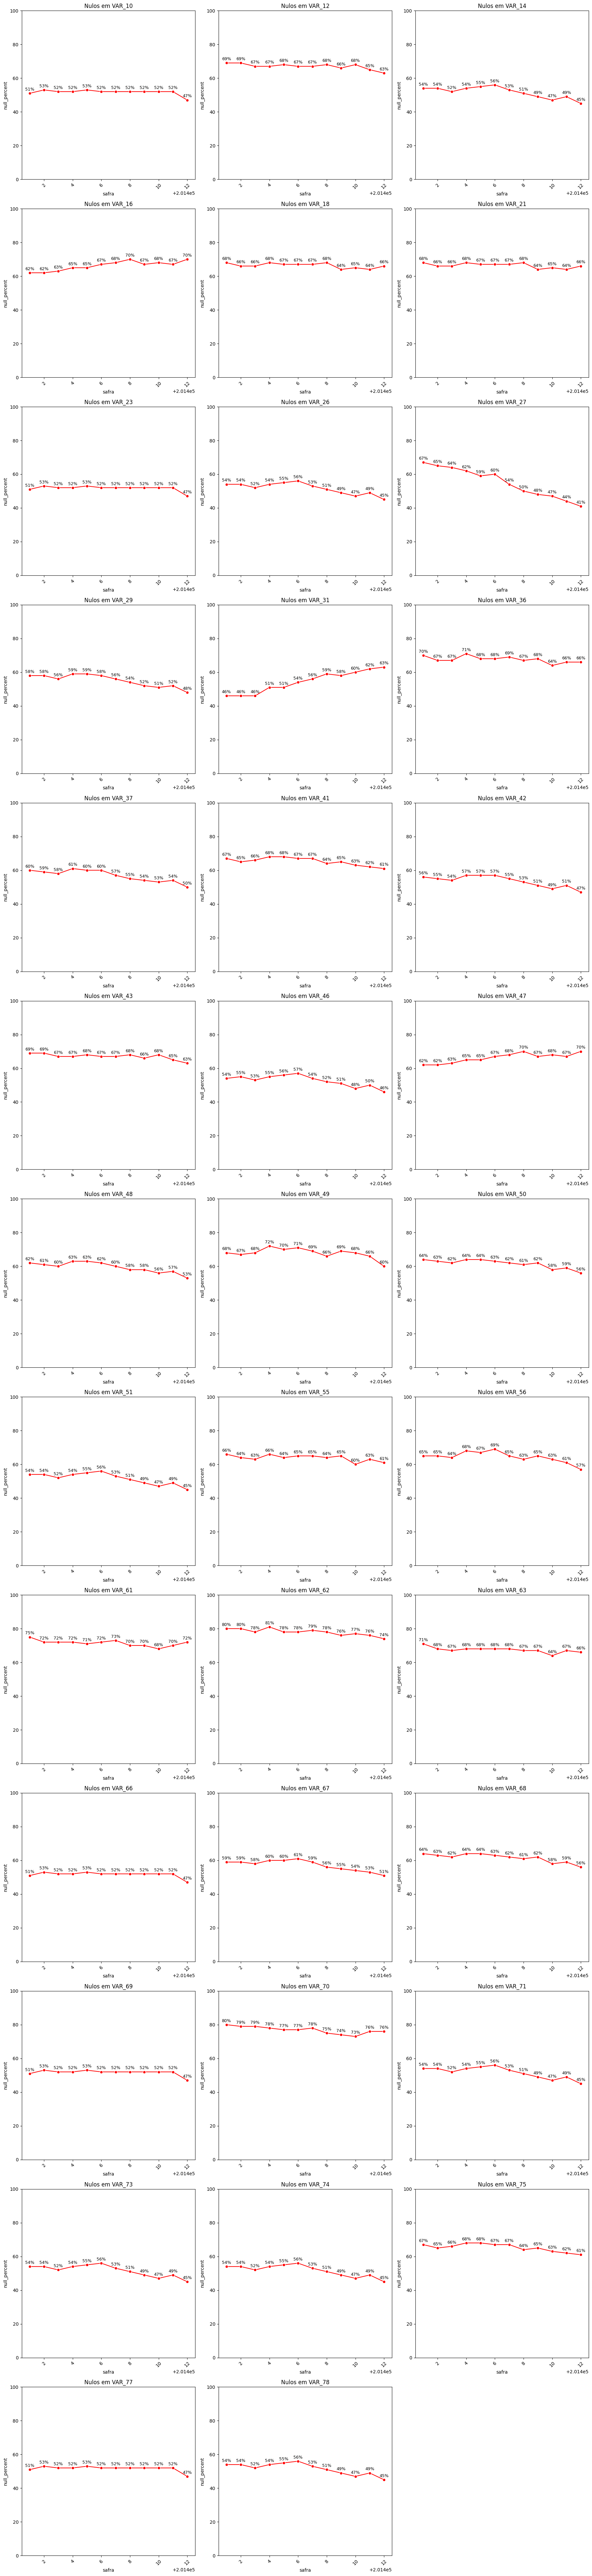

In [10]:
_ = plot_all_features_in_grid(df.loc[:,list(mean_null.query('mean_null>=50')['VAR'].values)+['safra']])

In [11]:
mean_null.query('std_null>=6 and mean_null<50')

VAR  mean_null   std_null
0  VAR_17  41.500000  14.247807
0  VAR_53  17.083333  24.001736
0  VAR_54  12.000000  24.117138

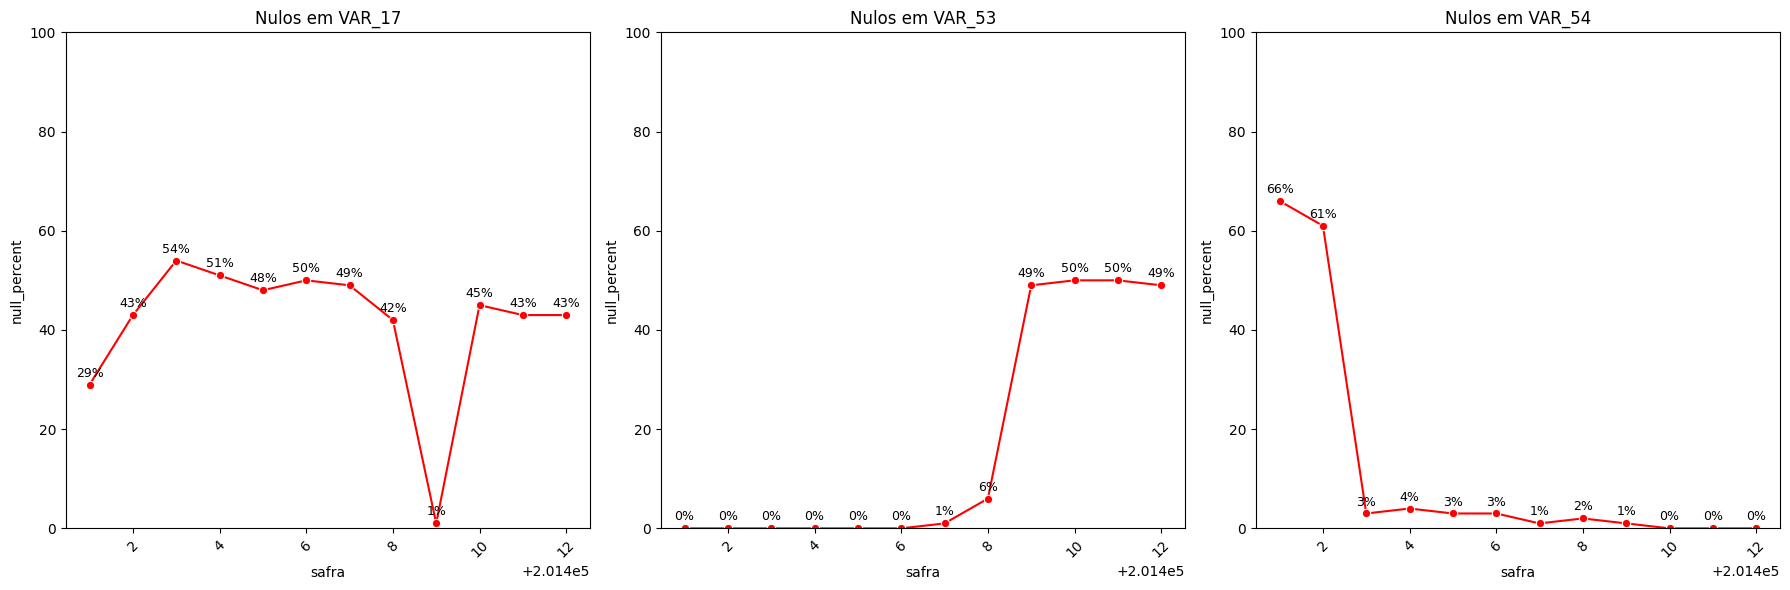

In [12]:
_ = plot_all_features_in_grid(df.loc[:,list(mean_null.query('std_null>=6 and mean_null<50')['VAR'].values)+['safra']])


In [13]:
# Features a serem deletadas:
cols_to_remove_nulls_vars = list(mean_null.query('std_null>=6 and mean_null<50')['VAR'].values) + list(mean_null.query('mean_null>=50')['VAR'].values)
cols_to_remove_nulls_vars

['VAR_17',
 'VAR_53',
 'VAR_54',
 'VAR_10',
 'VAR_12',
 'VAR_14',
 'VAR_16',
 'VAR_18',
 'VAR_21',
 'VAR_23',
 'VAR_26',
 'VAR_27',
 'VAR_29',
 'VAR_31',
 'VAR_36',
 'VAR_37',
 'VAR_41',
 'VAR_42',
 'VAR_43',
 'VAR_46',
 'VAR_47',
 'VAR_48',
 'VAR_49',
 'VAR_50',
 'VAR_51',
 'VAR_55',
 'VAR_56',
 'VAR_61',
 'VAR_62',
 'VAR_63',
 'VAR_66',
 'VAR_67',
 'VAR_68',
 'VAR_69',
 'VAR_70',
 'VAR_71',
 'VAR_73',
 'VAR_74',
 'VAR_75',
 'VAR_77',
 'VAR_78']

Acima temos as features que devem ser deletadas por possuirem alta densidade de nulos ou existe muita variação dos nulos entre safras.

### Aplicando a remoção

In [14]:
df.drop(cols_to_remove_nulls_vars,axis=1, inplace=True)
df.drop(cols_to_remove_flag_null,axis=1, inplace=True)
df

id   safra  y  VAR_1  VAR_2  VAR_3  VAR_4   VAR_5   VAR_6   VAR_7  \
0          1  201404  0    0.0    0.0    0.0    0.0  124.54  3277.0   51.98   
1          2  201407  0   64.0    0.0    2.0    1.0   47.92  2443.0   84.72   
2          3  201405  0   99.0    2.0    2.0    2.0   80.38  1824.0   26.63   
3          4  201412  0    0.0    0.0    0.0    0.0   10.58  3796.0     NaN   
4          5  201403  1    0.0    0.0    0.0    0.0   70.46   437.0   40.69   
...      ...     ... ..    ...    ...    ...    ...     ...     ...     ...   
10733  10734  201406  0   44.0    0.0    0.0    1.0  107.49   515.0  183.36   
10734  10735  201407  0    0.0    0.0    0.0    0.0   39.98  1029.0     NaN   
10735  10736  201403  1  169.0    3.0    1.0    2.0  105.08   819.0   49.28   
10736  10737  201402  1   46.0    0.0    0.0    1.0  265.79  1740.0     NaN   
10737  10738  201404  1   51.0    0.0    0.0    1.0     NaN  2573.0     NaN   

       VAR_8    VAR_9  VAR_11  VAR_13  VAR_15  VAR_19  VAR_20  VAR_22  VAR_24  \
0        NaN   500.00     NaN   73.26   26.98    45.0       8    63.0  492.84   
1        NaN  1000.00     NaN   38.53     NaN    18.0      12    31.0  335.44   
2        NaN  1893.35   29.98     NaN   73.55     2.0      12     4.0  362.71   
3        NaN  3000.00     NaN     NaN     NaN    11.0      12    14.0   74.06   
4      10.99  2000.00   62.78     NaN   29.58     0.0      12     0.0  493.22   
...      ...      ...     ...     ...     ...     ...     ...     ...     ...   
10733  49.70   500.00   20.64     NaN   50.98     0.0      10     0.0  601.87   
10734    NaN  1724.65     NaN     NaN     NaN     0.0      12     0.0   39.98   
10735  74.20  2759.03  127.34  101.96   37.58     0.0      12     0.0  443.92   
10736  15.45  1000.00     NaN   23.68     NaN     6.0      12     8.0  934.03   
10737    NaN  1851.27     NaN   18.69     NaN    17.0      12    25.0     NaN   

       VAR_25  VAR_28   VAR_30    VAR_32  VAR_33  VAR_34  VAR_35  VAR_38  \
0        12.0    12.0   500.00  0.133833    18.0     NaN     NaN  220.84   
1         9.0    10.0  1000.00  0.133833    13.0     NaN     NaN  338.90   
2         3.0     5.0  1893.35  0.133833     2.0     NaN   59.97  133.17   
3         0.0     0.0  3000.00  0.133833     3.0     NaN     NaN     NaN   
4         0.0     0.0  2000.00  0.090634     0.0   10.99  313.91  326.89   
...       ...     ...      ...       ...     ...     ...     ...     ...   
10733     0.0     0.0   500.00  0.090634     0.0  347.90  144.48  651.86   
10734     0.0     0.0  1724.65  0.133833     0.0     NaN     NaN     NaN   
10735     0.0     0.0  2759.03  0.133833     0.0  371.00  459.82  246.42   
10736     8.0    11.0  1000.00  0.133833     2.0  108.15     NaN     NaN   
10737     8.0     9.0  1851.27  0.133833     8.0     NaN     NaN     NaN   

       VAR_39  VAR_40  VAR_44  VAR_45  VAR_52  VAR_57  VAR_58  VAR_59  \
0       348.0     9.0    11.0  512.82   53.97      45   369.0   95.54   
1       179.0     5.0     9.0  269.71     NaN      60   228.0   97.73   
2         NaN     4.0    12.0     NaN  294.20      31   264.0  294.57   
3         NaN     5.0     6.0     NaN     NaN      76    49.0     NaN   
4         NaN     0.0     0.0     NaN  147.94      38   332.0     NaN   
...       ...     ...     ...     ...     ...     ...     ...     ...   
10733     NaN     0.0     0.0     NaN   50.98      27   467.0     NaN   
10734     NaN     7.0    10.0     NaN     NaN      40    39.0   29.01   
10735   418.0     1.0     3.0  419.84  187.92      45   442.0  369.46   
10736    94.0     5.0     8.0  135.82     NaN      28   869.0  319.33   
10737    56.0    10.0    11.0   56.09     NaN      28     NaN  130.75   

         VAR_60  VAR_64   VAR_65  VAR_72  VAR_76  VAR_10_is_null  \
0     -0.030478       0  1303.79   151.0  173.06           False   
1      0.357324       0  1486.26   187.0  184.69           False   
2     -0.411787       0   800.27    96.0  732.00           False   
3      0.721630       0   

### Avaliando outliers
Preparacao para realizar o tratamento dos dados faltantes

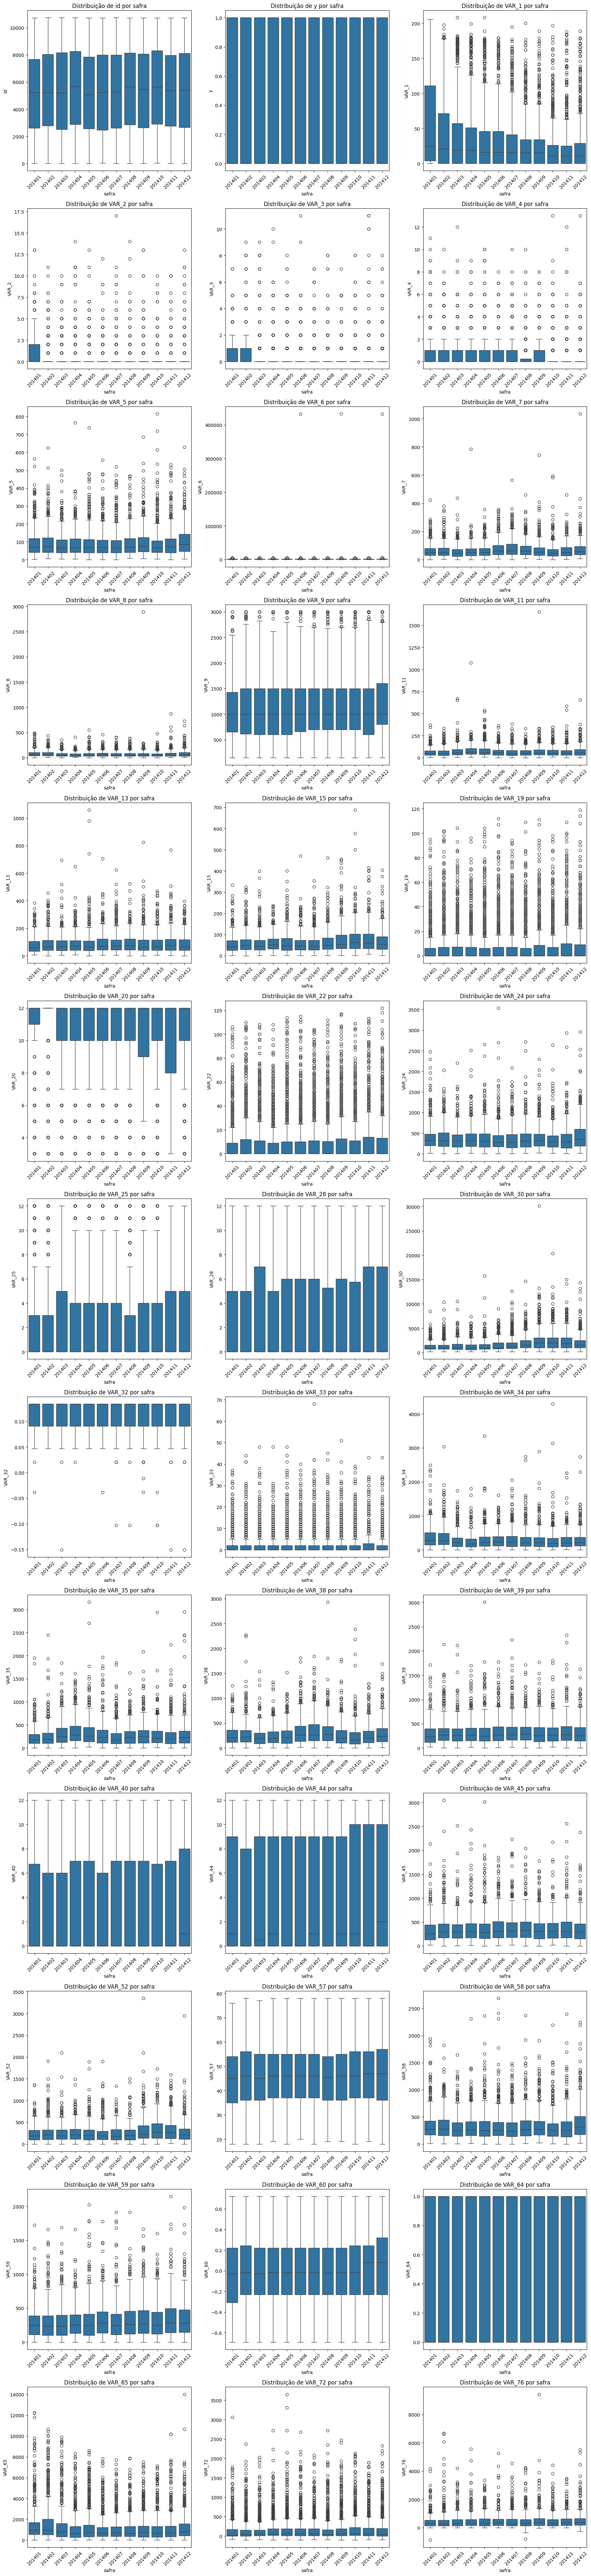

In [15]:
def plot_boxplots_for_safras(df, time_column='safra', cols=None):
    
    features = [col for col in df.columns if col != time_column and not ('is_null' in col)]
    if cols is not None:
        features = cols
    
    # Configuração do grid de plots
    n_cols = 3
    n_rows = (len(features) + n_cols - 1) // n_cols  # Arredondamento para cima
    
    # Cria figura com tamanho dinâmico baseado no número de linhas
    plt.figure(figsize=(18, n_rows * 6))
    
    # Itera sobre cada feature para criar os boxplots
    for i, feature in enumerate(features, 1):
        ax = plt.subplot(n_rows, n_cols, i)
        
        # Cria boxplot para a feature atual agrupada por safra
        sns.boxplot(
            data=df,
            x=time_column,
            y=feature,
            ax=ax
        )
        
        # Configurações estéticas
        plt.title(f'Distribuição de {feature} por {time_column}')
        plt.xticks(rotation=45)  # Rotaciona labels do eixo X
        plt.xlabel(time_column)
        plt.ylabel(feature)
    
    plt.tight_layout()  # Ajusta layout para evitar sobreposição
    plt.show()


plot_boxplots_for_safras(df)

In [16]:
def calculate_feature_stats_by_safra(df, time_column='safra', cols=None):
    
    features = [col for col in df.columns if col != time_column and not ('is_null' in col)]
    if cols is not None:
        features = cols
    
    melted_df = df.melt(
        id_vars=[time_column],
        value_vars=features,
        var_name='feature',
        value_name='value'
    )
    
    # Função para processar cada grupo
    def process_group(group):
        q1 = group['value'].quantile(0.25)
        q3 = group['value'].quantile(0.75)
        iqr = q3 - q1
        min_val = q1 - 12 * iqr
        max_val = q3 + 12 * iqr
        
        # Calcula outliers
        outlier_mask = ((group['value'] < min_val) | (group['value'] > max_val)) & ((max_val - min_val)>0)
        outlier_count = outlier_mask.sum()
        
        return pd.Series({
            'amplitude': max_val - min_val,
            'min': min_val,
            'max': max_val,
            'IQR': iqr,
            'outlier_count': outlier_count,
            'has_outliers': outlier_count > 0
        })
    
    # Aplica a função para cada grupo
    stats = melted_df.groupby([time_column, 'feature']).apply(process_group).reset_index()
    
    return stats

df_stats = calculate_feature_stats_by_safra(df)
df_stats

/var/folders/j5/f_z6ggzx709_x61cjbtbj5xr0000gn/T/ipykernel_59379/1927199913.py:36: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stats = melted_df.groupby([time_column, 'feature']).apply(process_group).reset_index()


safra feature   amplitude         min         max       IQR  \
0    201401   VAR_1    2675.000  -1280.0000   1395.0000   107.000   
1    201401  VAR_11    1226.875   -561.4075    665.4675    49.075   
2    201401  VAR_13    1799.625   -830.2050    969.4200    71.985   
3    201401  VAR_15    1140.500   -521.4550    619.0450    45.620   
4    201401  VAR_19     150.000    -72.0000     78.0000     6.000   
..      ...     ...         ...         ...         ...       ...   
463  201412  VAR_76   11681.500  -5418.2300   6263.2700   467.260   
464  201412   VAR_8    1716.375   -790.1925    926.1825    68.655   
465  201412   VAR_9   20041.250  -8819.8000  11221.4500   801.650   
466  201412      id  136087.500 -62653.7500  73433.7500  5443.500   
467  201412       y      25.000    -12.0000     13.0000     1.000   

     outlier_count  has_outliers  
0                0         False  
1                0         False  
2                0         False  
3                0         False  
4                6          True  
..             ...           ...  
463              0         False  
464              0         False  
465              0         False  
466              0         False  
467              0         False  

[468 rows x 8 columns]

In [17]:
df_stats.query("has_outliers")

safra feature   amplitude         min         max        IQR  \
4    201401  VAR_19    150.0000    -72.0000     78.0000     6.0000   
14   201401  VAR_33     50.0000    -24.0000     26.0000     2.0000   
33   201401  VAR_72   4300.0000  -2063.0000   2237.0000   172.0000   
43   201402  VAR_19    175.0000    -84.0000     91.0000     7.0000   
53   201402  VAR_33     50.0000    -24.0000     26.0000     2.0000   
72   201402  VAR_72   3931.2500  -1888.0000   2043.2500   157.2500   
73   201402  VAR_76  10138.1250  -4735.4450   5402.6800   405.5250   
82   201403  VAR_19    181.2500    -87.0000     94.2500     7.2500   
92   201403  VAR_33     50.0000    -24.0000     26.0000     2.0000   
111  201403  VAR_72   3750.0000  -1791.0000   1959.0000   150.0000   
118  201404  VAR_11   1603.0000   -729.6000    873.4000    64.1200   
121  201404  VAR_19    175.0000    -84.0000     91.0000     7.0000   
131  201404  VAR_33     50.0000    -24.0000     26.0000     2.0000   
149  201404   VAR_7   1258.0000   -575.8400    682.1600    50.3200   
150  201404  VAR_72   4262.5000  -2030.2500   2232.2500   170.5000   
158  201405  VAR_13   1744.0000   -797.6400    946.3600    69.7600   
160  201405  VAR_19    150.0000    -72.0000     78.0000     6.0000   
168  201405  VAR_30  25000.0000 -11300.0000  13700.0000  1000.0000   
170  201405  VAR_33     50.0000    -24.0000     26.0000     2.0000   
189  201405  VAR_72   4487.5000  -2142.0000   2345.5000   179.5000   
199  201406  VAR_19    175.0000    -84.0000     91.0000     7.0000   
209  201406  VAR_33     50.0000    -24.0000     26.0000     2.0000   
223  201406   VAR_6  36800.0000 -17221.0000  19579.0000  1472.0000   
228  201406  VAR_72   4412.5000  -2106.5000   2306.0000   176.5000   
238  201407  VAR_19    175.0000    -84.0000     91.0000     7.0000   
248  201407  VAR_33     50.0000    -24.0000     26.0000     2.0000   
277  201408  VAR_19    150.0000    -72.0000     78.0000     6.0000   
287  201408  VAR_33     50.0000    -24.0000     26.0000     2.0000   
292  201408   VAR_4      6.2500     -3.0000      3.2500     0.2500   
306  201408  VAR_72   4000.0000  -1913.0000   2087.0000   160.0000   
313  201409  VAR_11   1442.7500   -660.0300    782.7200    57.7100   
316  201409  VAR_19    212.5000   -102.0000    110.5000     8.5000   
324  201409  VAR_30  50000.0000 -23000.0000  27000.0000  2000.0000   
326  201409  VAR_33     50.0000    -24.0000     26.0000     2.0000   
340  201409   VAR_6  41900.0000 -19672.0000  22228.0000  1676.0000   
345  201409  VAR_72   4350.0000  -2076.0000   2274.0000   174.0000   
346  201409  VAR_76  12214.8125  -5695.9325   6518.8800   488.5925   
347  201409   VAR_8   1440.0000   -660.8200    779.1800    57.6000   
355  201410  VAR_19    175.0000    -84.0000     91.0000     7.0000   
365  201410  VAR_33     50.0000    -24.0000     26.0000     2.0000   
366  201410  VAR_34   6274.1875  -2917.4450   3356.7425   250.9675   
404  201411  VAR_33     75.0000    -36.0000     39.0000     3.0000   
425  201411   VAR_8   1597.5000   -736.8100    860.6900    63.9000   
433  201412  VAR_19    225.0000   -108.0000    117.0000     9.0000   
443  201412  VAR_33     50.0000    -24.0000     26.0000     2.0000   
457  201412   VAR_6  39756.2500 -18630.0000  21126.2500  1590.2500   
461  201412   VAR_7   1444.2500   -657.6500    786.6000    57.7700   

     outlier_count  has_outliers  
4                6          True  
14               9          True  
33               1          True  
43               7          True  
53              11          True  
72               1          True  
73               3          True  
82               1          True  
92              11          True  
111              2          True  
118              1          True  
121              2          True  
131              7          True  
149              1          True  
150              1          True  
158              2          True  
160              7          True  
168            

In [18]:
df_stats.query("has_outliers")['feature'].unique()

array(['VAR_19', 'VAR_33', 'VAR_72', 'VAR_76', 'VAR_11', 'VAR_7',
       'VAR_13', 'VAR_30', 'VAR_6', 'VAR_4', 'VAR_8', 'VAR_34'],
      dtype=object)

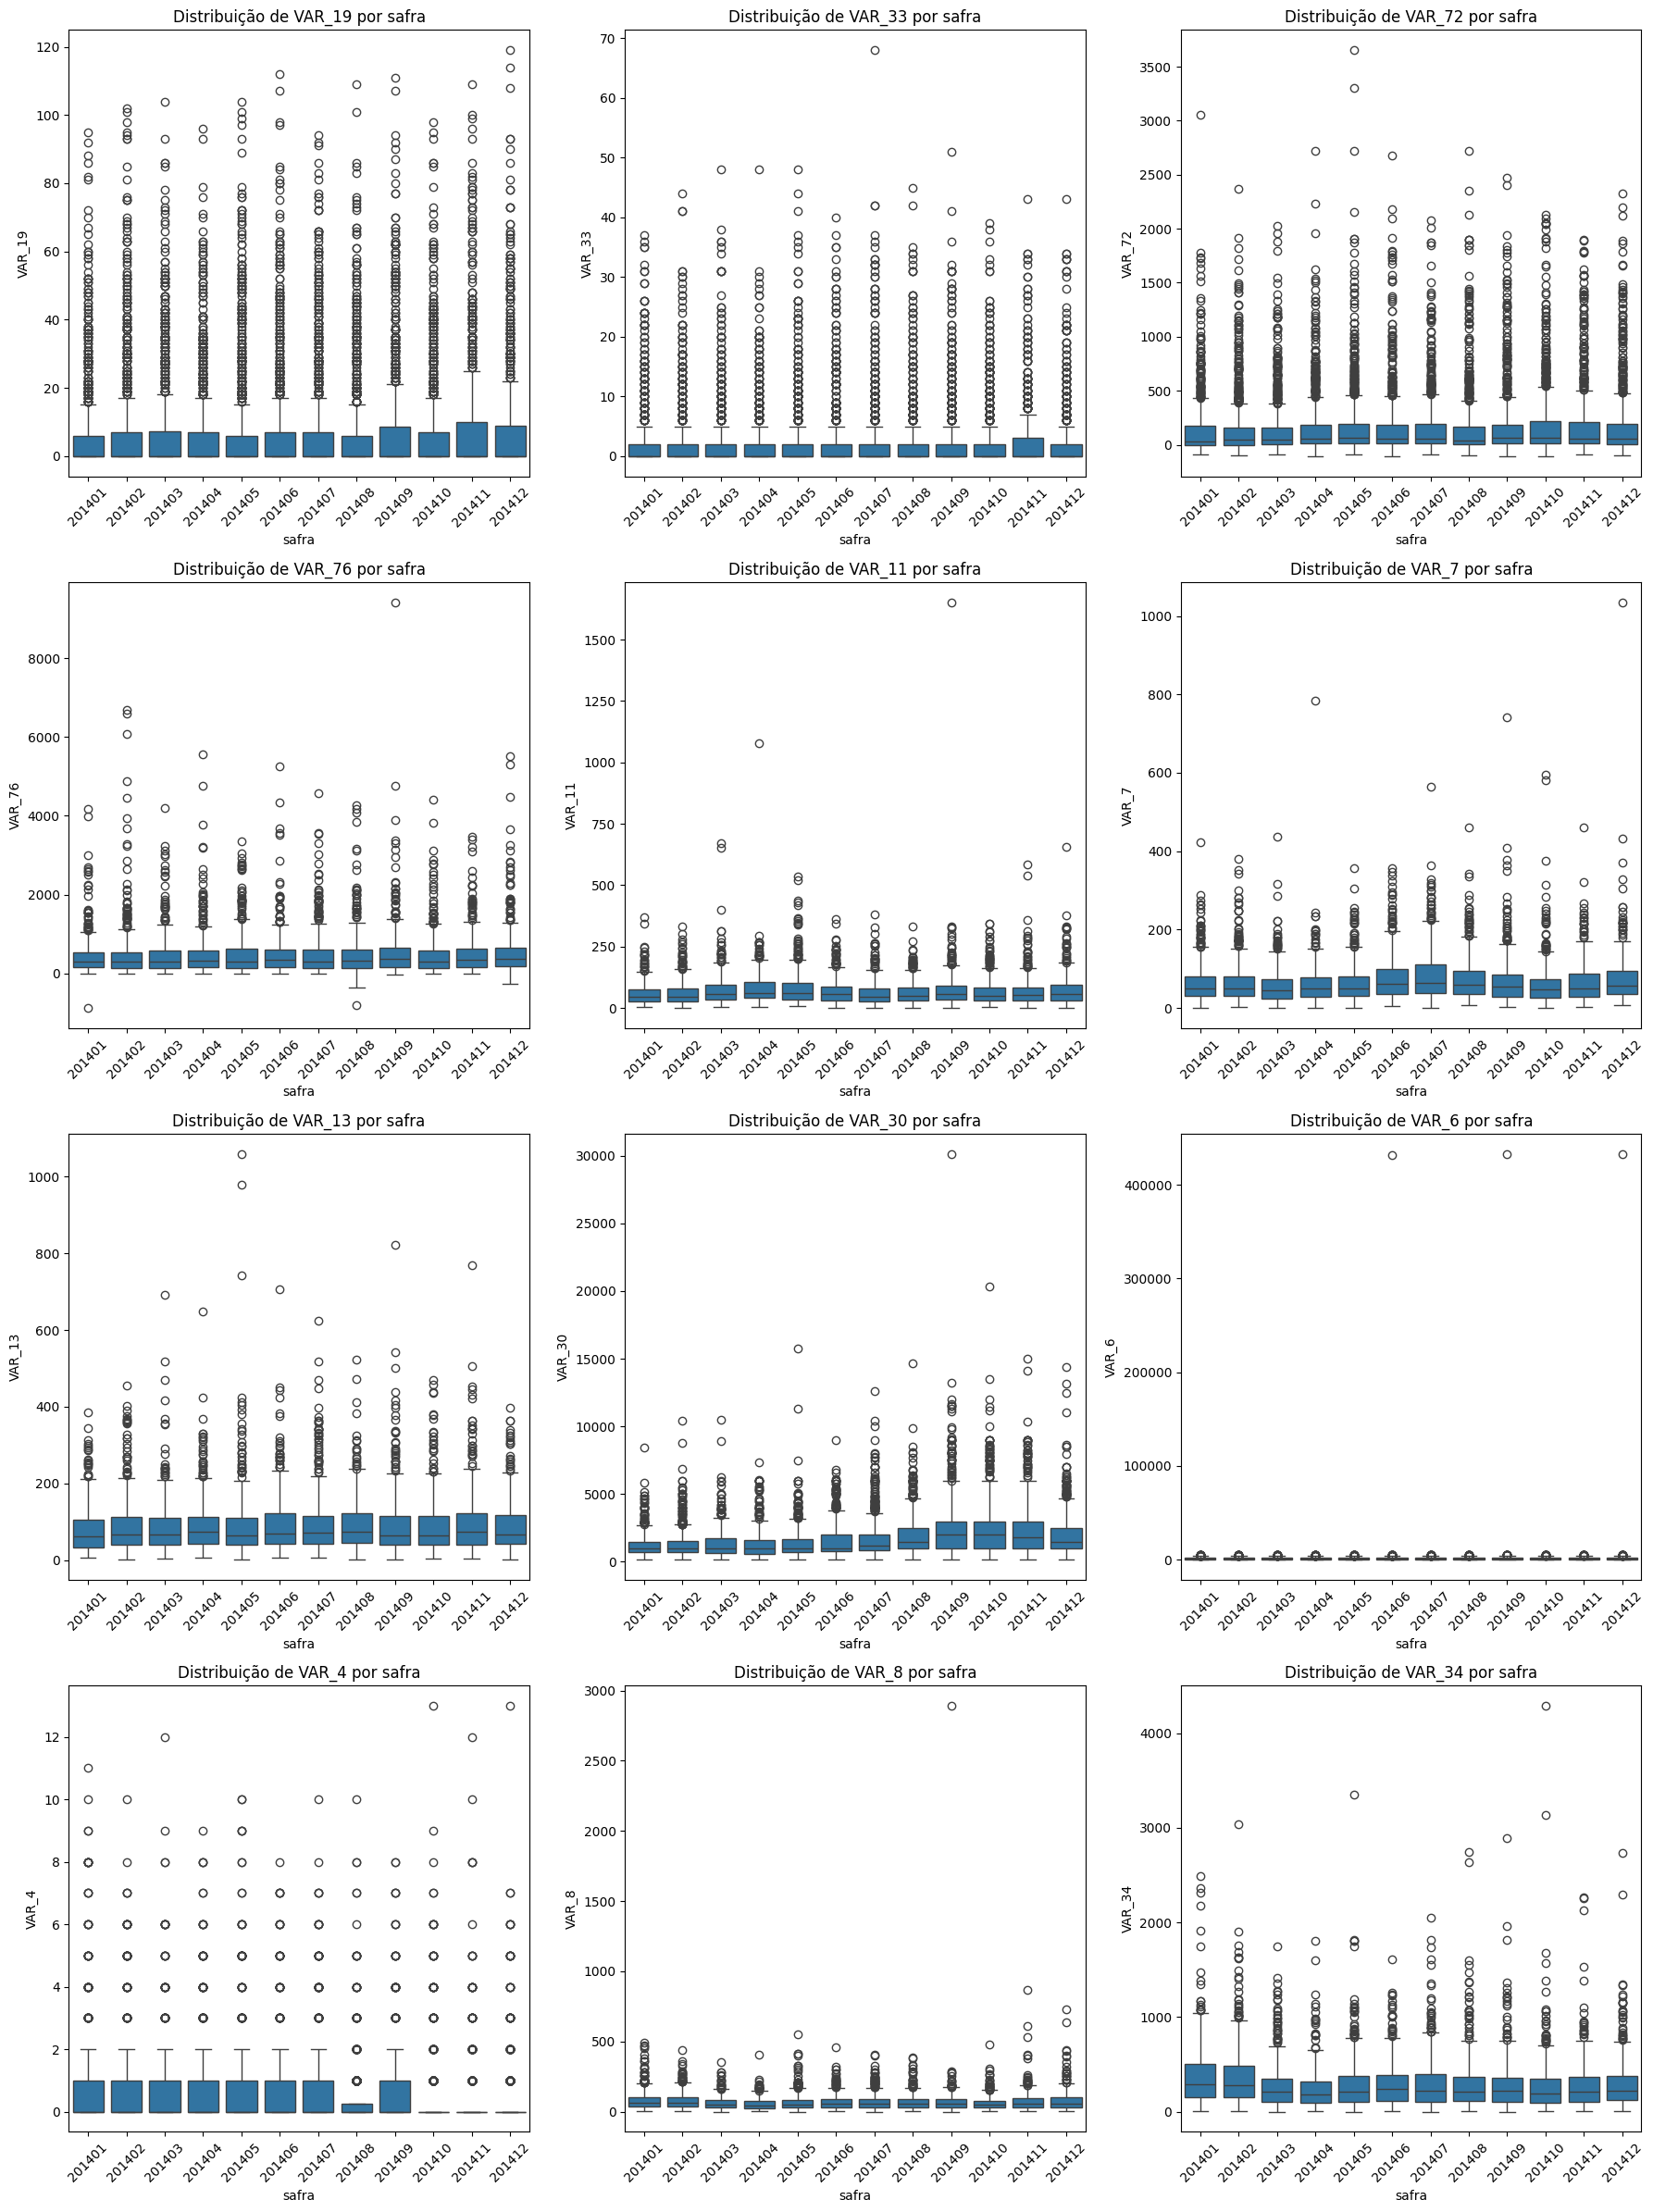

In [19]:
plot_boxplots_for_safras(df, time_column='safra', cols=df_stats.query("has_outliers")['feature'].unique())

In [20]:
def treat_outliers_with_null(df, time_column='safra', cols=None):
    """
    Substitui outliers por NaN mantendo a estrutura original do DataFrame.
    """
    # Calcular estatísticas de outliers
    stats = calculate_feature_stats_by_safra(df, time_column, cols)
    
    # Criar cópia do DataFrame para tratamento
    treated_df = df.copy()
    
    # Iterar sobre cada combinação safra/feature
    for (safra, feature), group_stats in stats.set_index([time_column, 'feature']).iterrows():
        # Definir máscara de outliers
        mask = (
            (treated_df[time_column] == safra) & 
            (
                (treated_df[feature] < group_stats['min']) | 
                (treated_df[feature] > group_stats['max'])
            ))
        
        # Substituir outliers por NaN
        treated_df.loc[mask, feature] = pd.NA
    
    return treated_df


/var/folders/j5/f_z6ggzx709_x61cjbtbj5xr0000gn/T/ipykernel_59379/1927199913.py:36: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stats = melted_df.groupby([time_column, 'feature']).apply(process_group).reset_index()
/var/folders/j5/f_z6ggzx709_x61cjbtbj5xr0000gn/T/ipykernel_59379/1927199913.py:36: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stats = melted_df.groupby([time_column, 'feature']).apply(process

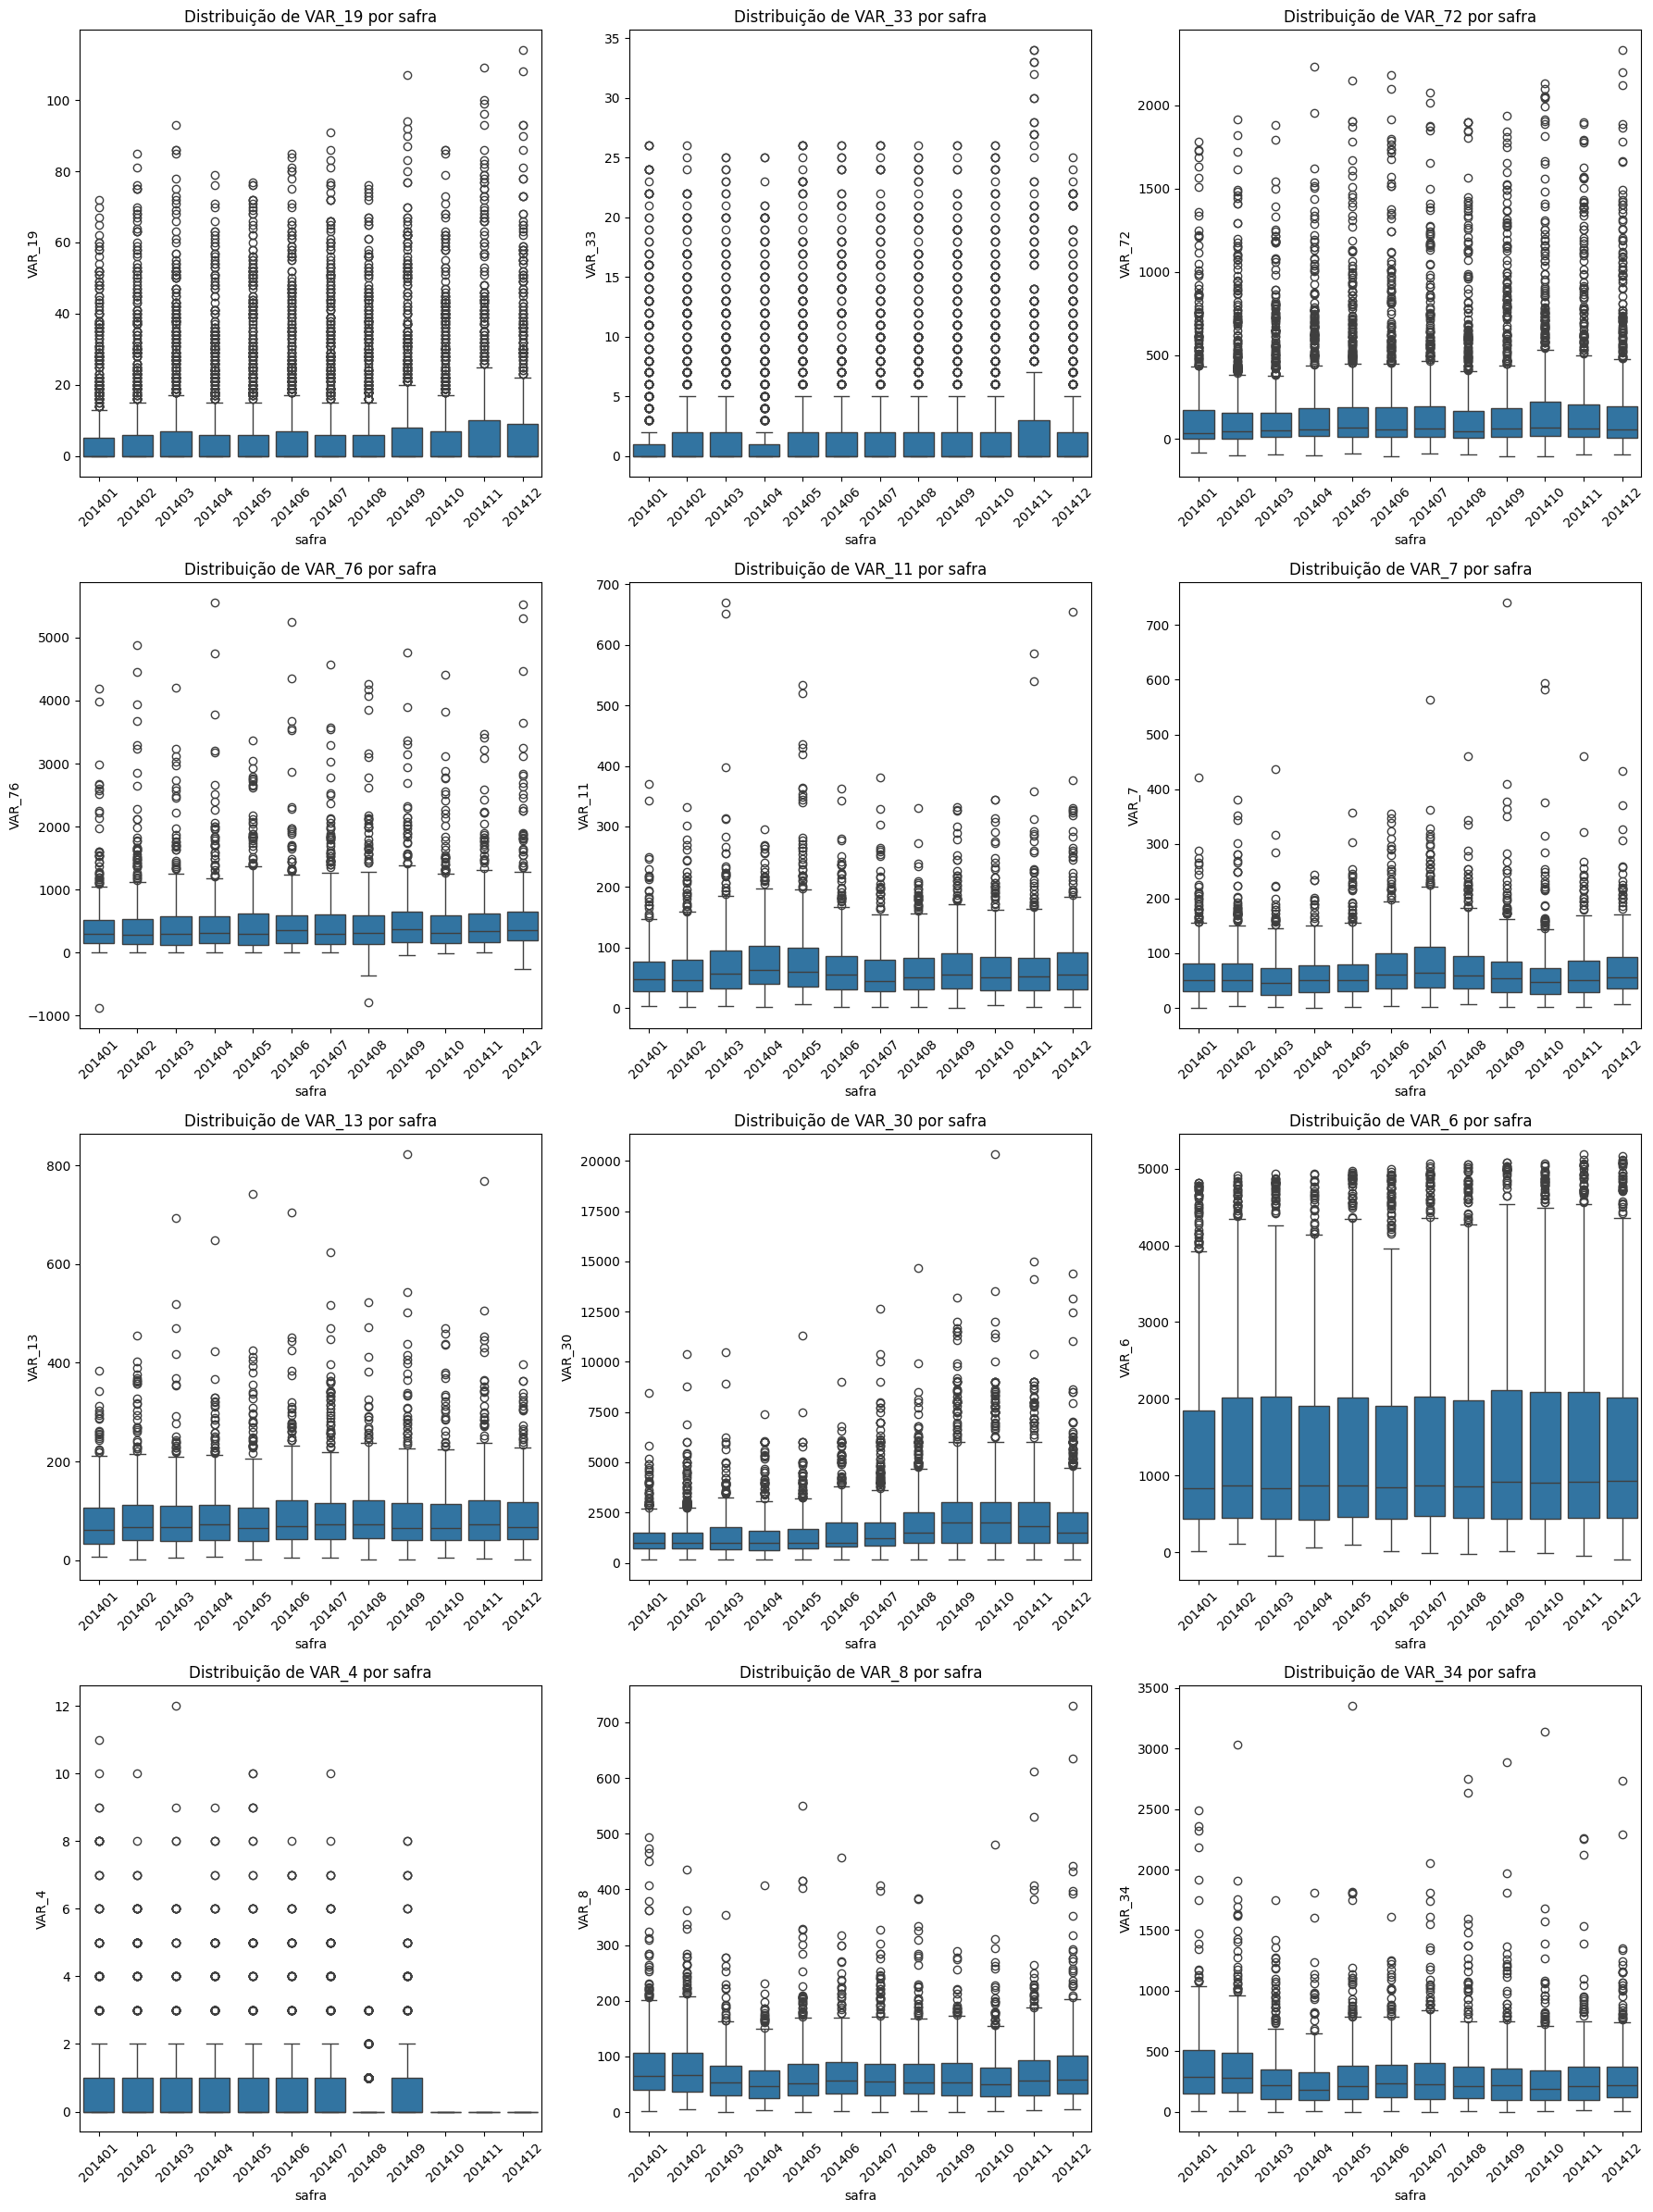

In [21]:
df_trated = treat_outliers_with_null(df, time_column='safra', cols=treat_outliers_with_null(df, time_column='safra', cols=None))
plot_boxplots_for_safras(df_trated, time_column='safra', cols=df_stats.query("has_outliers")['feature'].unique())


In [22]:
# para a VAR_76 temos alguns valores negativos que parecem ser outliers. Como não temos o significado real das features vou substituilos por nulos, assumindo que sejam outliers.
df_trated.loc[df_trated['VAR_76'] < 0,:]

id   safra    y  VAR_1  VAR_2  VAR_3  VAR_4   VAR_5   VAR_6  VAR_7  \
1924  1925.0  201409  0.0   34.0    0.0    0.0    1.0   65.69  3081.0    NaN   
4469  4470.0  201401  0.0   51.0    0.0    0.0    1.0     NaN   851.0  75.00   
4549  4550.0  201408  0.0    0.0    0.0    0.0    0.0  117.02   698.0  70.90   
4951  4952.0  201410  0.0    0.0    0.0    0.0    0.0   17.98   878.0    NaN   
6733  6734.0  201412  1.0   41.0    0.0    0.0    NaN   84.37  1259.0  32.39   
7349  7350.0  201408  0.0   34.0    0.0    0.0    2.0   51.18   764.0  34.36   
7449  7450.0  201407  1.0   46.0    0.0    0.0    1.0   63.58  2042.0    NaN   
8482  8483.0  201410  0.0    6.0    0.0    0.0    0.0   23.32  1044.0  24.47   
9534  9535.0  201408  1.0   39.0    0.0    0.0    2.0   89.62  3288.0  96.18   

       VAR_8    VAR_9  VAR_11  VAR_13  VAR_15  VAR_19  VAR_20  VAR_22  VAR_24  \
1924   50.55  1000.00   26.97   42.29   63.79    15.0    12.0    31.0  175.59   
4469     NaN   800.00     NaN   92.16     NaN     0.0     8.0     0.0     NaN   
4549   86.31   800.00     NaN   45.57   37.77     0.0    12.0     0.0  456.91   
4951     NaN  2767.77     NaN     NaN     NaN     0.0    12.0     0.0   17.98   
6733     NaN  2703.39     NaN   11.99   32.40     0.0    12.0     0.0  421.88   
7349     NaN  2000.00     NaN     NaN     NaN     0.0    10.0     0.0  255.91   
7449  113.08  2312.02   51.16   42.38  122.95     8.0    12.0    16.0  317.90   
8482   76.31   890.00   35.98   58.12     NaN     0.0     7.0     0.0   69.98   
9534   86.72   800.00   32.23   70.94   69.08     9.0    12.0    12.0  477.45   

      VAR_25  VAR_28   VAR_30    VAR_32  VAR_33  VAR_34  VAR_35  VAR_38  \
1924     4.0     5.0  2000.00  0.133833    16.0  353.85   26.97     NaN   
4469     0.0     0.0   800.00  0.133833     0.0     NaN     NaN  600.00   
4549     1.0     2.0  1600.00  0.133833     0.0  195.95     NaN  392.27   
4951     0.0     0.0  2767.77  0.133833     0.0     NaN     NaN     NaN   
6733     4.0     6.0  2703.39  0.133833     0.0     NaN     NaN  161.97   
7349     0.0     0.0  2000.00  0.133833     0.0     NaN     NaN  240.52   
7449     1.0     1.0  2312.02  0.133833     8.0  767.58  231.88     NaN   
8482     0.0     0.0  1780.00  0.133833     0.0  464.27  147.96  122.38   
9534     0.0     0.0  1600.00  0.133833     3.0  267.87  257.84  673.31   

      VAR_39  VAR_40  VAR_44  VAR_45  VAR_52  VAR_57  VAR_58   VAR_59  \
1924   195.0     1.0     2.0  296.03  446.53    52.0   130.0   101.68   
4469   478.0     3.0     4.0  737.28     NaN    51.0     NaN     0.00   
4549   135.0     2.0     4.0  171.60  224.27    32.0   398.0    60.84   
4951     NaN     4.0     5.0     NaN     NaN    61.0    17.0    63.72   
6733    59.0    10.0    12.0   59.99   32.40    42.0   420.0   258.86   
7349     NaN     1.0     2.0     NaN     NaN    54.0   255.0  1042.13   
7449   211.0     6.0     8.0  211.94  522.95    42.0   317.0    32.00   
8482   255.0    10.0    11.0  364.30     NaN    73.0    69.0   144.61   
9534   343.0     1.0     3.0  530.49  276.34    35.0   372.0    22.86   

        VAR_60  VAR_64   VAR_65  VAR_72  VAR_76 VAR_10_is_null VAR_12_is_null  \
1924  0.156301     1.0   250.67   -26.0  -34.77          False          False   
4469  0.156301     1.0  1340.00   182.0 -876.22          False           True   
4549 -0.354108     1.0   962.57    68.0 -361.52          False           True   
4951  0.357324     0.0      NaN   400.0   -3.99          False           True   
6733 -0.073756     0.0      NaN   258.0 -265.67          False          False   
7349  0.219380     1.0  1540.62    95.0 -795.05          False           True   
7449 -0.073756     0.0  2412.38   -48.0   -0.52          False           True   
8482  0.721630     0.0   873.78   -71.0   -9.67          False          False   
9534 -0.308453     1.0   143.15   -42.0  -24.09          False           True   

     VAR_16_is_null VAR_17_is_null VAR_18_is_null VAR_21_is_null  \
1924          False          False   

In [23]:
df_trated.loc[df_trated['VAR_76'] < 0,'VAR_76'] = np.nan

### Imputação para preencher valores ausentes usando a abordagem k-Nearest Neighbors

In [24]:
X_train = df_trated[df_trated['safra']<=201408].convert_dtypes()#.drop(columns=['y','safra','id'])
y_train = df_trated[df_trated['safra']<=201408]['y']

X_valid = df_trated[df_trated['safra'].isin([201409,201410])].convert_dtypes()#.drop(columns=['y','safra','id'])
y_valid = df_trated[df_trated['safra'].isin([201409,201410])]['y']

X_test = df_trated[df_trated['safra']>=201411].convert_dtypes()#.drop(columns=['y','safra','id'])
y_test = df_trated[df_trated['safra']>=201411]['y']

In [94]:
scaler = MinMaxScaler()
scaler.fit(X_train.drop(columns=['y','safra','id']))

X_scaled = scaler.transform(X_train.drop(columns=['y','safra','id']))  # Aqui os NaNs originais voltam
X_scaled = pd.DataFrame(X_scaled, columns=X_train.drop(columns=['y','safra','id']).columns)

imputer = KNNImputer(n_neighbors=10)
X_train_imputed = imputer.fit_transform(X_scaled)  # Ajusta e transforma o treino
X_train_imputed = scaler.inverse_transform(X_train_imputed)

X_train_imputed = pd.concat([X_train[['y','safra','id']].reset_index(drop=True), 
                             pd.DataFrame(X_train_imputed, columns=X_train.drop(columns=['y','safra','id']).reset_index(drop=True).columns)],axis=1)
X_train_imputed

y   safra     id  VAR_1  VAR_2  VAR_3  VAR_4    VAR_5   VAR_6    VAR_7  \
0     0  201404      1    0.0    0.0    0.0    0.0  124.540  3277.0   51.980   
1     0  201407      2   64.0    0.0    0.0    1.0   47.920  2443.0   84.720   
2     0  201405      3   99.0    0.0    0.0    2.0   80.380  1824.0   26.630   
3     1  201403      5    0.0    0.0    0.0    0.0   70.460   437.0   40.690   
4     0  201405      6   61.0    0.0    0.6    1.0   75.985   140.0   39.830   
...  ..     ...    ...    ...    ...    ...    ...      ...     ...      ...   
7329  0  201406  10734   44.0    0.0    0.0    1.0  107.490   515.0  183.360   
7330  0  201407  10735    0.0    0.0    0.0    0.0   39.980  1029.0   61.394   
7331  1  201403  10736  169.0    1.2    0.9    2.0  105.080   819.0   49.280   
7332  1  201402  10737   46.0    0.0    0.0    1.0  265.790  1740.0   40.925   
7333  1  201404  10738   51.0    0.0    0.0    1.0   86.885  2573.0   74.121   

       VAR_8    VAR_9   VAR_11   VAR_13  VAR_15  VAR_19  VAR_20  VAR_22  \
0     43.692   500.00   41.287   73.260  26.980    45.0     8.0    63.0   
1     47.974  1000.00   94.033   38.530  39.364    18.0    12.0    31.0   
2     64.266  1893.35   29.980   61.053  73.550     2.0    12.0     4.0   
3     10.990  2000.00   62.780   50.321  29.580     0.0    12.0     0.0   
4     55.310   400.00   47.697   80.098  44.502     0.0    10.0     0.0   
...      ...      ...      ...      ...     ...     ...     ...     ...   
7329  49.700   500.00   20.640   55.921  50.980     0.0    10.0     0.0   
7330  67.351  1724.65   47.364   53.723  39.971     0.0    12.0     0.0   
7331  74.200  2759.03  127.340  101.960  37.580     0.0    12.0     0.0   
7332  15.450  1000.00   85.955   23.680  41.789     6.0    12.0     8.0   
7333  58.561  1851.27   96.732   18.690  52.080    17.0    12.0    25.0   

       VAR_24  VAR_25  VAR_28   VAR_30    VAR_32  VAR_33   VAR_34   VAR_35  \
0     492.840    12.0    12.0   500.00  0.133833    18.0  211.111  187.468   
1     335.440     9.0    10.0  1000.00  0.133833    13.0  241.876  415.306   
2     362.710     3.0     5.0  1893.35  0.133833     2.0  408.637   59.970   
3     493.220     0.0     0.0  2000.00  0.090634     0.0   10.990  313.910   
4     261.568     0.0     0.0   400.00  0.046709     0.0  145.960  229.790   
...       ...     ...     ...      ...       ...     ...      ...      ...   
7329  601.870     0.0     0.0   500.00  0.090634     0.0  347.900  144.480   
7330   39.980     0.0     0.0  1724.65  0.133833     0.0  216.092  257.909   
7331  443.920     0.0     0.0  2759.03  0.133833     0.0  371.000  459.820   
7332  934.030     8.0    11.0  1000.00  0.133833     2.0  108.150  350.292   
7333  310.290     8.0     9.0  1851.27  0.133833     8.0  224.310  336.916   

       VAR_38  VAR_39  VAR_40  VAR_44   VAR_45   VAR_52  VAR_57  VAR_58  \
0     220.840   348.0     9.0    11.0  512.820   53.970    45.0   369.0   
1     338.900   179.0     5.0     9.0  269.710  242.579    60.0   228.0   
2     133.170   190.8     4.0    12.0  216.241  294.200    31.0   264.0   
3     326.890   177.9     0.0     0.0  222.492  147.940    38.0   332.0   
4     278.810   186.3     0.0     0.0  244.732  237.613    33.0   233.5   
...       ...     ...     ...     ...      ...      ...     ...     ...   
7329  651.860   179.0     0.0     0.0  243.276   50.980    27.0   467.0   
7330  247.067   201.3     7.0    10.0  244.765  141.984    40.0    39.0   
7331  246.420   418.0     1.0     3.0  419.840  187.920    45.0   442.0   
7332  178.594    94.0     5.0     8.0  135.820  209.245    28.0   869.0   
7333  188.845    56.0    10.0    11.0   56.090  170.687    28.0   295.6   

       VAR_59    VAR_60  VAR_64    VAR_65  VAR_72   VAR_76  VAR_10_is_null  \
0      95.540 -0.030478     0.0  1303.790   151.0  173.060             0.0   
1      97.730  0.357324     0.0  1486.260   187.0  184.690             0.0   
2     294.570 -0.411787     0.0   800.270    96.0  732.000             0

In [95]:
# imputer = KNNImputer(n_neighbors=30)
# X_train_imputed = imputer.fit_transform(X_train.drop(columns=['y','safra','id']))  # Ajusta e transforma o treino
# X_train_imputed = pd.concat([X_train[['y','safra','id']].reset_index(drop=True), 
#                              pd.DataFrame(X_train_imputed, columns=X_train.drop(columns=['y','safra','id']).reset_index(drop=True).columns)],axis=1)
# X_train_imputed

In [96]:
# avaliando a qualidade da inputação
X_full = X_train.copy().dropna().drop(columns=['y','safra','id'])

# Mascarando 10% dos valores de uma variável
X_masked = X_full.copy()
mask = np.random.rand(*X_masked.shape) < 0.1
X_masked[mask] = np.nan

In [123]:
X_scaled = scaler.transform(X_masked)  
X_scaled = pd.DataFrame(X_scaled, columns=X_masked.columns)

# Imputando
X_imputed = imputer.transform(X_scaled)

r2 = r2_score(scaler.transform(X_full) , X_imputed)

print(f"R2_score na imputação: {r2:.4f}")

X_imputed = scaler.inverse_transform(X_imputed)

# Avaliando: só comparamos onde houve máscara
original = X_full.values[mask]
predicted = X_imputed[mask]

r2 = r2_score(original, predicted)
mae = mean_absolute_error(original, predicted)

print(f"R2_score na imputação: {r2:.4f}")
print(f"MAE na imputação: {mae:.4f}")


R2_score na imputação: 0.8538
R2_score na imputação: 0.6747
MAE na imputação: 91.2147


/Users/brunobarella/Documents/git_folder/picpay_processo - cópia/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KNNImputer was fitted without feature names
  warnings.warn(


In [98]:
X_valid_scaled = scaler.transform(X_valid.drop(columns=['y','safra','id'])) 

X_valid_imputed = imputer.fit_transform(X_valid_scaled)  # Ajusta e transforma o treino
X_valid_imputed = scaler.inverse_transform(X_valid_imputed)

X_valid_imputed = pd.concat([X_valid[['y','safra','id']].reset_index(drop=True),
                             pd.DataFrame(X_valid_imputed, columns=X_valid.drop(columns=['y','safra','id']).columns).reset_index(drop=True)],axis=1)

In [99]:
X_test_scaled = scaler.transform(X_test.drop(columns=['y','safra','id'])) 

X_test_imputed = imputer.fit_transform(X_test_scaled)  # Ajusta e transforma o treino
X_test_imputed = scaler.inverse_transform(X_test_imputed)

X_test_imputed = pd.concat([X_test[['y','safra','id']].reset_index(drop=True),
                            pd.DataFrame(X_test_imputed, columns=X_test.drop(columns=['y','safra','id']).reset_index(drop=True).columns)],axis=1)

In [100]:
df_trated_inputed = pd.concat([X_train_imputed,X_valid_imputed,X_test_imputed],axis=0)

### Varificando Distribuições

In [101]:
df_trated_inputed.groupby(['safra'],as_index=False)['id'].nunique()

safra   id
0   201401  854
1   201402  898
2   201403  873
3   201404  955
4   201405  972
5   201406  902
6   201407  968
7   201408  912
8   201409  877
9   201410  933
10  201411  808
11  201412  786

In [102]:
df_trated_inputed.groupby(['safra'],as_index=False)['y'].mean()

safra         y
0   201401  0.346604
1   201402  0.312918
2   201403   0.25315
3   201404  0.257592
4   201405  0.252058
5   201406  0.263858
6   201407  0.277893
7   201408  0.281798
8   201409  0.299886
9   201410  0.285102
10  201411  0.332921
11  201412  0.352417

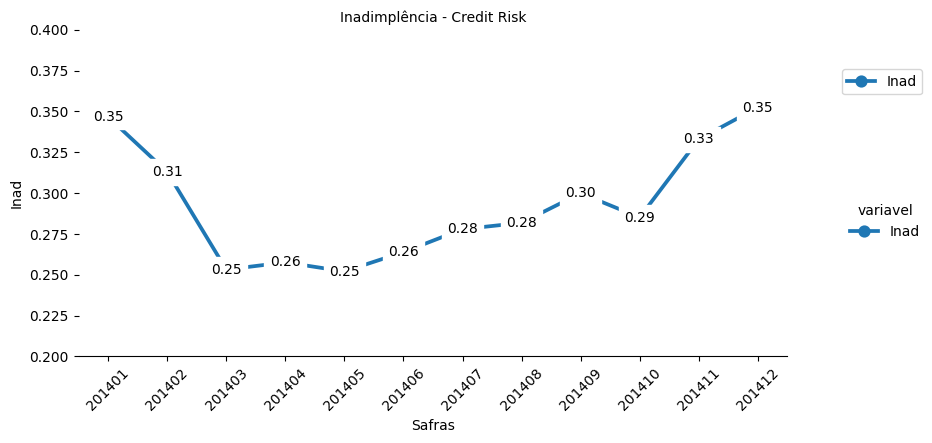

In [118]:
df_melted = pd.melt(df_trated_inputed.groupby('safra',as_index=False)['y'].mean(), id_vars=['safra'], var_name='variavel', value_name='valor')
df_melted_auc = df_melted[df_melted['variavel'].isin(['y'])]

legend_mapping = {'y': 'Inad'}
df_melted_auc['variavel'] = df_melted_auc['variavel'].map(legend_mapping)

ax = sns.catplot(x="safra", y="valor", hue='variavel', height=4, aspect=2, capsize=.2, kind="point", data=df_melted_auc, palette = "tab10")

for ind_i, safra in enumerate(list(sorted(set(df_melted_auc['safra'].values)))):
    for var in list(sorted(set(df_melted_auc['variavel'].values))):
        value = df_melted_auc[(df_melted_auc['safra']==safra)&(df_melted_auc['variavel']==var)]['valor'].values[0]
        ax.ax.text(ind_i, value, f'{value:.2f}', backgroundcolor='white', color='black', ha='center', va='center', zorder=5)
        
ax.set(xlabel = 'Safras', ylabel = 'Inad')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 0.9))

plt.title(f"Inadimplência - Credit Risk", fontsize=10)
ax.despine(left=True)
plt.xticks(rotation=45)
plt.ylim(0.2, 0.4)
plt.show()

## 3 - Avaliando o poder preditivo das Features

In [104]:
target = 'y'

In [105]:
def calculate_binnings(df, feature, target):
    optb = OptimalBinning(
        name=feature, #(nome da variável)
        min_event_rate_diff=0.001,
        dtype="numerical",
        solver="cp",
        min_n_bins=2,
        max_pvalue=0.05,
        max_n_bins=20,
        min_prebin_size=0.05,
        special_codes=[-1],
        monotonic_trend="auto_asc_desc")
    
    optb.fit(df[feature].values, df[target].values)
    
    return optb.binning_table

In [106]:
list_features = list(set(df.columns) - set(['safra', 'id', target]))
#list_features = list(set(df_features.columns) - set(['cpf_trend_lag', 'snapshot_date_trend_lag','over30', 'bin_collection']))
list_erro = []
list_ivs = []
for feature in list_features:
    try:
        binning_table = calculate_binnings(df_trated_inputed, feature, target)
        table_iv = binning_table.build()
        list_ivs.append(table_iv[table_iv.index=='Totals']['IV'].values[0])
        
    except:
        list_erro.append(feature)

In [107]:
list_erro

[]

In [108]:
df_ivs = pd.DataFrame({'features':list_features, 'IV':list_ivs})
df_ivs.sort_values(['IV'], ascending=False, inplace=True)

In [109]:
df_ivs[df_ivs['IV']>=0.018]

features        IV
15           VAR_1  0.528898
33           VAR_3  0.308989
47           VAR_2  0.280755
46           VAR_4  0.270013
12          VAR_20  0.183152
35           VAR_6  0.179808
39          VAR_65  0.140272
8           VAR_19  0.136163
32          VAR_22  0.132800
20  VAR_47_is_null  0.132343
16  VAR_16_is_null  0.131949
11  VAR_21_is_null  0.127328
36  VAR_18_is_null  0.127328
24          VAR_28  0.126633
45          VAR_25  0.125238
18          VAR_32  0.122654
1           VAR_33  0.122426
23           VAR_9  0.110973
0           VAR_44  0.110860
48          VAR_40  0.110405
13  VAR_12_is_null  0.102449
50  VAR_43_is_null  0.102449
10          VAR_64  0.096410
37          VAR_57  0.096211
5           VAR_60  0.094788
31  VAR_10_is_null  0.091275
52  VAR_23_is_null  0.091275
3   VAR_66_is_null  0.091275
6   VAR_69_is_null  0.091275
17  VAR_77_is_null  0.091275
40  VAR_31_is_null  0.080694
25  VAR_17_is_null  0.070707
41  VAR_76_is_null  0.058624
19  VAR_59_is_null  0.058624
38          VAR_59  0.058605
4           VAR_30  0.055427
49          VAR_76  0.033657
27          VAR_72  0.028451
30          VAR_13  0.024862
29          VAR_39  0.019632

In [110]:
len(df_ivs[df_ivs['IV']>=0.018])

40

In [111]:
len(df_trated_inputed.columns)-3

53

In [112]:
len(df_trated_inputed.columns)-3-len(df_ivs[df_ivs['IV']>=0.018])

13

In [113]:
# Features com baixo poder preditivo
df_ivs[df_ivs['IV']<0.018]

features        IV
51          VAR_45  0.017680
9           VAR_34  0.015785
7            VAR_8  0.010015
28          VAR_58  0.008473
44          VAR_52  0.008416
34          VAR_24  0.008134
22          VAR_15  0.007566
21           VAR_5  0.005148
26          VAR_38  0.004608
43          VAR_35  0.001990
14          VAR_11  0.000000
42           VAR_7  0.000000
2   VAR_62_is_null  0.000000

In [114]:
df_trated_inputed.drop(columns=df_ivs.loc[df_ivs['IV']<0.018, 'features' ]).to_csv('dados/df_trated_inputed.csv', index=False)